<a href="https://colab.research.google.com/github/wahyufaith/Computer-Vision/blob/main/Computer_vision_Hyperparameter_Tuning_(h2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wahyu Pebrianto**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255
test_images  = test_images/255

**hyperparameter tuning**

In [ ]:
from tensorflow import keras
#!pip install -q -U keras-tuner
import keras_tuner as kt

**1. membuat fungsi model untuk menentukan model klasifikasi image**

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  
  #Sesuaikan jumlah unit di layer Dense pertama
  #Pilih nilai optimal antara 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  hp_units2 = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units2, activation='relu'))
  hp_units3 = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(keras.layers.Dense(10))

  #Sesuaikan Learning rate untuk pengoptimal
  #Pilih nilai optimal dari 0,01, 0,001, atau 0,0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
  return model


**2. Instansiasi tuner dan lakukan hypertuning**

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     overwrite=True,
                     directory='/content/sample_data',
                     project_name='intro_to_kt')

**3. Buat callback untuk menghentikan training lebih awal setelah mencapai nilai tertentu dalam loss validation**

proses ini bisa ditambahkan maupaun tidak

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

**4. Jalankan pencarian hyperparameter (mirip seperti tf.keras.model.fit).**

In [ ]:
tuner.search(train_images,
             train_labels,
             epochs=50,
             validation_split=0.2,
             callbacks=[stop_early])

#melihat nilai hyperparameter optimal yang ditemukan oleh pencarian
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 53s]
val_accuracy: 0.8202499747276306

Best val_accuracy So Far: 0.878166675567627
Total elapsed time: 00h 15m 39s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 384 and the optimal learning rate for the optimizer
is 0.001.



**5. setelah mendapatkan hyperparameter terbaik lanjutkan melatih model**

Temukan jumlah epoch yang optimal untuk melatih model dengan hyperparameter yang diperoleh dari pencarian.

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) +1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7493 - accuracy: 0.7177 - val_loss: 0.5555 - val_accuracy: 0.7960
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4970 - accuracy: 0.8175 - val_loss: 0.5030 - val_accuracy: 0.8177
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4362 - accuracy: 0.8376 - val_loss: 0.4416 - val_accuracy: 0.8350
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3998 - accuracy: 0.8535 - val_loss: 0.3951 - val_accuracy: 0.8562
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3730 - accuracy: 0.8614 - val_loss: 0.3696 - val_accuracy: 0.8648
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3568 - accuracy: 0.8675 - val_loss: 0.3673 - val_accuracy: 0.8641
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3373 - accuracy: 0.8745 - val_loss: 0.3756 - val_accuracy:

**6. Training modelnya**

Temukan jumlah epoch yang optimal untuk melatih model dengan hyperparameter yang diperoleh dari pencarian.

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
history= hypermodel.fit(train_images,
               train_labels,
               epochs=best_epoch,
               validation_split=0.2)

Epoch 1/46
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7520 - accuracy: 0.7176 - val_loss: 0.5235 - val_accuracy: 0.8132
Epoch 2/46
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4955 - accuracy: 0.8177 - val_loss: 0.4556 - val_accuracy: 0.8316
Epoch 3/46
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4304 - accuracy: 0.8434 - val_loss: 0.4263 - val_accuracy: 0.8422
Epoch 4/46
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3939 - accuracy: 0.8559 - val_loss: 0.4066 - val_accuracy: 0.8493
Epoch 5/46
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3710 - accuracy: 0.8641 - val_loss: 0.3841 - val_accuracy: 0.8607
Epoch 6/46
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3525 - accuracy: 0.8700 - val_loss: 0.3603 - val_accuracy: 0.8692
Epoch 7/46
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3339 - accuracy: 0.8769 - val_loss: 0.3390 - val_accuracy:

In [ ]:
hypermodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 384)               301440    
_________________________________________________________________
dense_1 (Dense)              (None, 384)               147840    
_________________________________________________________________
dense_2 (Dense)              (None, 384)               147840    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3850      
Total params: 600,970
Trainable params: 600,970
Non-trainable params: 0
_________________________________________________________________


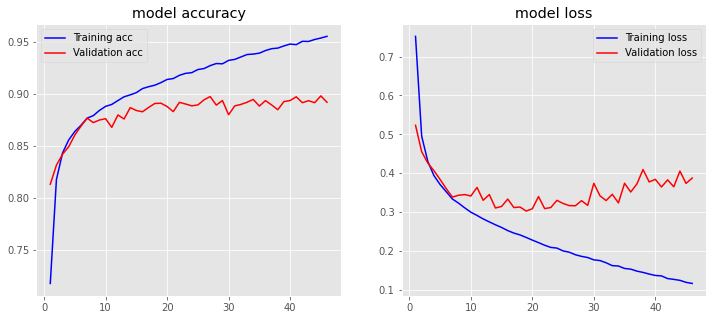

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('model accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('model loss')
    plt.legend()
  
plot_history(history)